In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D,BatchNormalization, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import tensorflow_datasets as tfds

import os
import numpy as np
import matplotlib.pyplot as plt

**3.- ¿Gato o Perro?**

**Desarrolle una herramienta de reconocimiento de imágenes que clasifique si una imagen pertenece a un perro o gato.**

**a.- Obtenga el dataset. Acceda a https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P14-Convolutional-Neural-Networks.zip Obtendrá un dataset de 10000 imágenes, 5000 de gatos y 5000 de perros.**

**b.- Importe las librerías a utilizar y divida el dataset en entrenamiento y test (80% y 20%)**

In [0]:
_URL = 'https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P14-Convolutional-Neural-Networks.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'Convolutional_Neural_Networks/dataset/')

232611840/232607759 [==============================] - 6s 0us/step


In [0]:
train_dir = os.path.join(PATH, 'training_set')
test_dir = os.path.join(PATH, 'test_set')

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.1)
test_image_generator = ImageDataGenerator(rescale=1./255)  # se deja un porcentaje para validacion del modelo

In [0]:
batch_size = 64
epochs = 15
IMG_HEIGHT = 120
IMG_WIDTH = 120

In [0]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary',
                                                           subset='training') #se toma la parte definida para entrenamiento

validation_data_gen = train_image_generator.flow_from_directory(directory=train_dir, # mismo directorio q el entrenamiento para tomar la parte de validacion
                                                                target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                                 shuffle=True,
                                                                batch_size=batch_size,
                                                                class_mode='binary',
                                                                subset='validation')#validacion

test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=test_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 7200 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


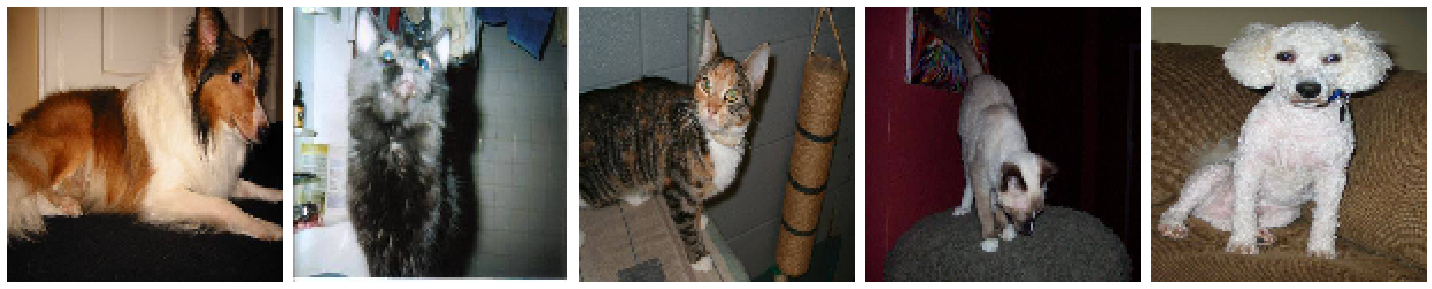

In [0]:
sample_training_images, _ = next(train_data_gen)

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(sample_training_images[:5])

**c.- Construya la CNN con una capa de convolución + RELU + Max. Pool**

**d.- Agregue al Modelo 2 capas completamente conectadas. La primera de 128 neuronas y la Segunda. ¿Cuántas neuronas debería tener?¿Depende de la función de activación que utilicemos?**

La cantidad de neuronas de salida dependera de la funcion de activación a utilizar. Ademas tambien depende del tipo de clasificacion que necesitemos y cantidad de clases a clasificar. Para este caso podemos usar simoid con 1 neurona para clasificacion binaria. O tambien podriamos usar softmax con 2 neuronas.

In [0]:
IMG_SHAPE=(IMG_HEIGHT,IMG_WIDTH,3)
model = Sequential()
#bloque 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=IMG_SHAPE))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 118, 118, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 59, 59, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 111392)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               14258304  
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 14,259,329
Trainable params: 14,259,329
Non-trainable params: 0
_________________________________________________________________


**e.- Compile el modelo usando los siguientes parámetros: optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy']**

In [0]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

**f.- Entrene la Red. Utilice 15 epocas y revise como mejora la accuracy en cada época. Nota este proceso podría tardar un buen tiempo ! (registre el tiempo apróximado de entrenamiento)**

In [0]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch= train_data_gen.samples // batch_size,
    epochs=epochs,
    validation_data=validation_data_gen,
    validation_steps=validation_data_gen.samples //batch_size
)

Epoch 1/15
112/112 [==============================] - 20s 177ms/step - loss: 1.0006 - accuracy: 0.6010 - val_loss: 0.6071 - val_accuracy: 0.6784
Epoch 2/15
112/112 [==============================] - 20s 176ms/step - loss: 0.5390 - accuracy: 0.7405 - val_loss: 0.6692 - val_accuracy: 0.6458
Epoch 3/15
112/112 [==============================] - 20s 177ms/step - loss: 0.4318 - accuracy: 0.8110 - val_loss: 0.5896 - val_accuracy: 0.7109
Epoch 4/15
112/112 [==============================] - 20s 177ms/step - loss: 0.3220 - accuracy: 0.8735 - val_loss: 0.5819 - val_accuracy: 0.7188
Epoch 5/15
112/112 [==============================] - 20s 175ms/step - loss: 0.2174 - accuracy: 0.9190 - val_loss: 0.8532 - val_accuracy: 0.7083
Epoch 6/15
112/112 [==============================] - 20s 175ms/step - loss: 0.1511 - accuracy: 0.9515 - val_loss: 0.8210 - val_accuracy: 0.6745
Epoch 7/15
112/112 [==============================] - 20s 179ms/step - loss: 0.0988 - accuracy: 0.9721 - val_loss: 0.8750 - val_ac

**g.- Pruebe el modelo**

In [0]:
results = model.evaluate(test_data_gen)

32/32 [==============================] - 5s 154ms/step - loss: 1.4530 - accuracy: 0.6905


In [0]:
print('Test loss:', results[0])
print('Test accuracy:', results[1])

Test loss: 1.4529946483671665
Test accuracy: 0.6905


In [0]:
predictions = model.predict_classes(test_data_gen, batch_size=None)
print('predictions shape:', predictions.shape)

predictions shape: (2000, 1)


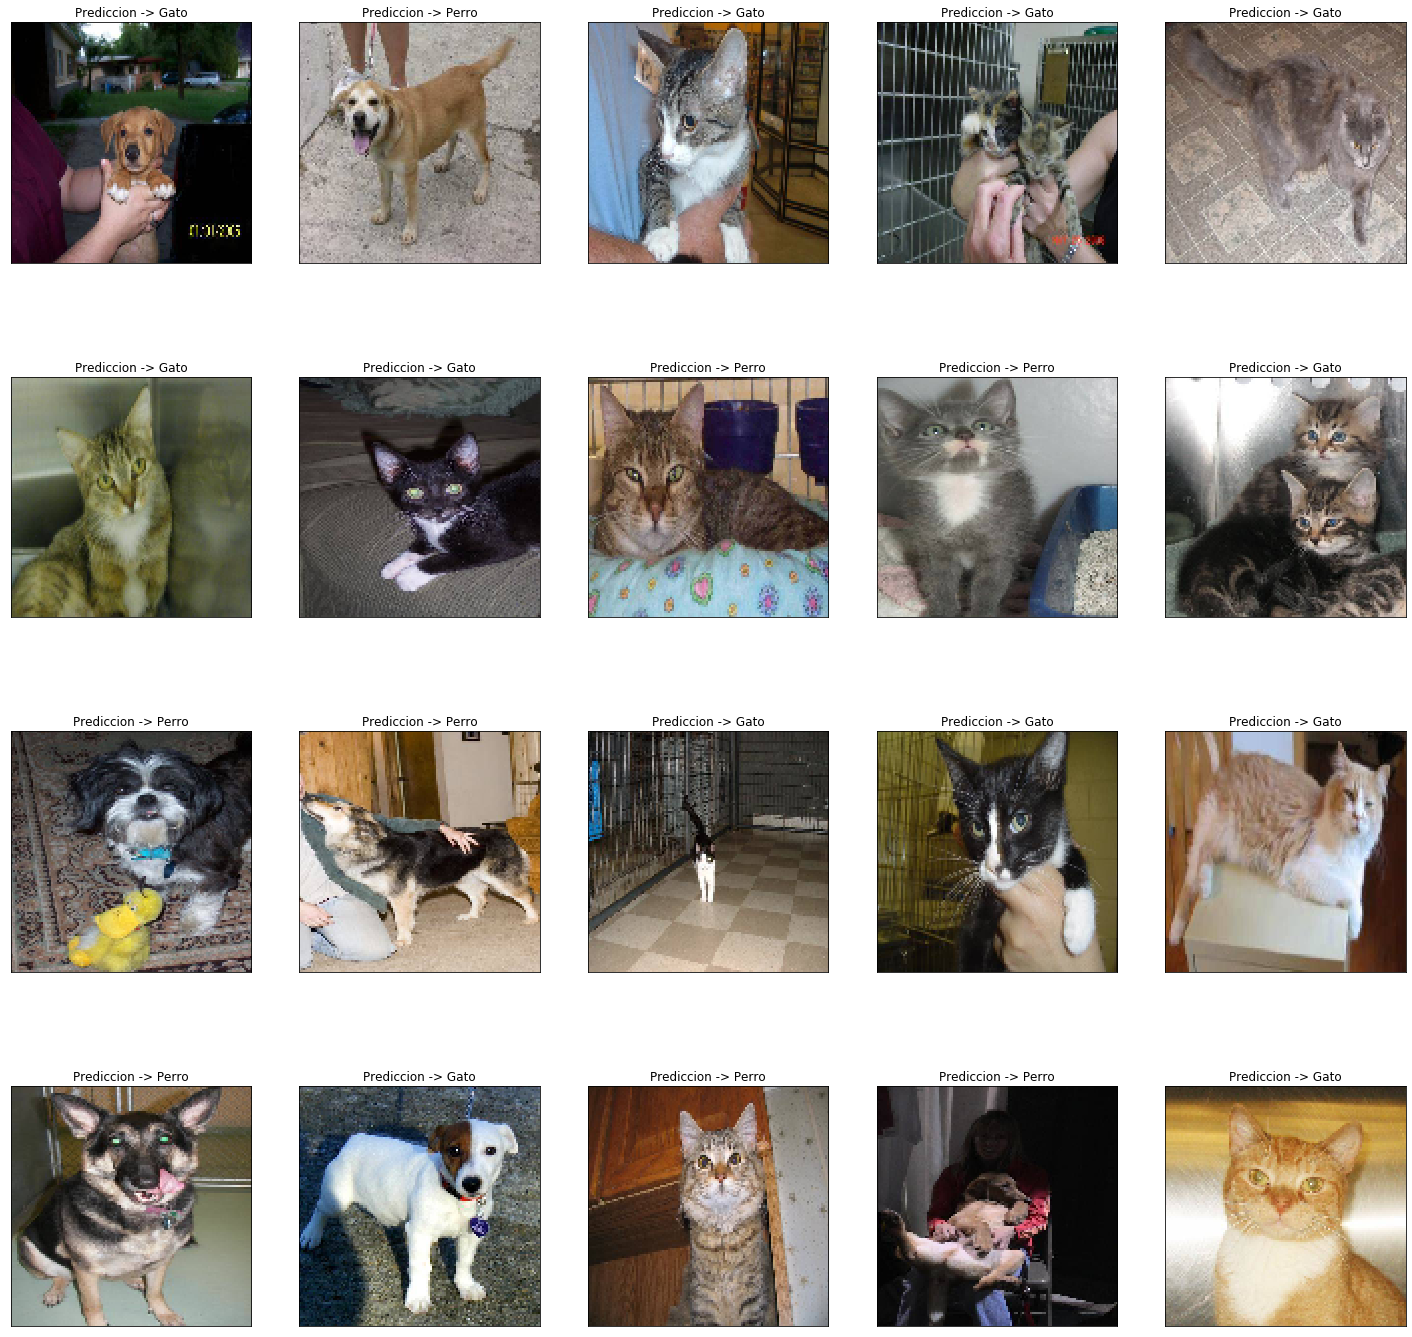

In [0]:
sample, _ = next(test_data_gen)
fig, axes = plt.subplots(4, 5, figsize=(25, 25), subplot_kw={'xticks': (), 'yticks': ()})
classes = {0: 'Gato', 1: 'Perro'}
for image,pred,ax in zip(sample[:20],predictions[:50],axes.ravel()):
  ax.imshow(image)
  ax.set_title("Prediccion -> {}".format(classes[pred[0]]))